In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("white")

In [2]:
collie_articles = pd.read_json("../data/preprocessed/COLLIE/articles.json")
print(f"length: {collie_articles.__len__()}")
collie_articles.head()

length: 782


,article_name,article_content
0,Article 1,(1) Private rights must be congruent with the ...
1,Article 2,This Code must be construed so as to honor the...
2,Article 3,(1) The enjoyment of private rights commences ...
3,Article 3-2,If the person making a juridical act did not h...
4,Article 4,The age of majority is 20 years of age.


In [3]:
collie_queries = pd.read_json("../data/preprocessed/COLLIE/query_article.json")
print(f"length: {collie_queries.__len__()}")
collie_queries.head()

length: 887


,query,articles
0,Acceptance made by a minor that received an of...,[Article 5]
1,"If a minor, after getting permission for carry...",[Article 6]
2,The purchase of daily household items may not ...,[Article 9]
3,"If a person under curatorship performs, withou...","[Article 13, Article 120, Article 122]"
4,The person in question may not request a comm...,"[Article 7, Article 11]"


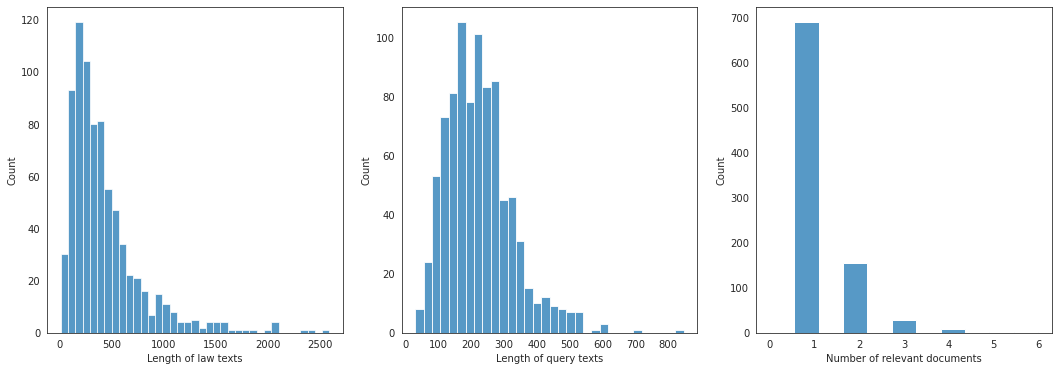

In [4]:
articles_lengths = collie_articles.article_content.map(lambda text: len(text))
query_lengths = collie_queries['query'].map(lambda text: len(text))
num_answers = collie_queries.articles.map(lambda lst: len(lst))

f, ax = plt.subplots(ncols=3, figsize=(18, 6))
sns.histplot(articles_lengths, ax=ax[0])
ax[0].set(xlabel="Length of law texts")
ax[0].grid(False)
sns.histplot(query_lengths, ax=ax[1])
ax[1].set(xlabel="Length of query texts",)
ax[1].grid(False)
sns.histplot(num_answers, ax=ax[2])
ax[2].set(xlabel="Number of relevant documents")
ax[2].grid(False)
plt.savefig('../figures/collie_graphs.png', bbox_inches='tight')
plt.show()

In [5]:
collie_queries.head(5)

,query,articles
0,Acceptance made by a minor that received an of...,[Article 5]
1,"If a minor, after getting permission for carry...",[Article 6]
2,The purchase of daily household items may not ...,[Article 9]
3,"If a person under curatorship performs, withou...","[Article 13, Article 120, Article 122]"
4,The person in question may not request a comm...,"[Article 7, Article 11]"


In [6]:
articles_lengths.describe()

count     782.000000
mean      423.768542
std       361.880158
min         7.000000
25%       189.250000
50%       321.000000
75%       516.750000
max      2591.000000
Name: article_content, dtype: float64

In [7]:
query_lengths.describe()

count    887.000000
mean     225.021421
std      102.805985
min       30.000000
25%      153.000000
50%      214.000000
75%      277.000000
max      847.000000
Name: query, dtype: float64

In [8]:
num_answers.describe()

count    887.000000
mean       1.281849
std        0.619052
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        6.000000
Name: articles, dtype: float64

In [ ]:
|f